In [1]:
import pandas as pd
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

In [3]:
TrnFlsPth=gb.glob("DTrain/*/*")
TstFlsPth=gb.glob("DTest/*/*")

In [4]:
Tr_lbl=[e.strip().split('\\')[1] for e in TrnFlsPth]
Ts_lbl=[e.strip().split('\\')[1] for e in TstFlsPth]
trl=[]
a={trl.append(e) for e in Tr_lbl if(e not in trl)}
tsl=[]
a={tsl.append(e) for e in Ts_lbl if(e not in tsl)}
a=None
print(trl, '\n', tsl)

['alum', 'barley', 'coffee', 'dmk', 'fuel', 'livestock', 'palm-oil', 'retail', 'soybean', 'veg-oil'] 
 ['alum', 'barley', 'coffee', 'dmk', 'fuel', 'livestock', 'palm-oil', 'retail', 'soybean', 'veg-oil']


In [5]:
le =LabelEncoder()
Y_Tr=le.fit_transform(Tr_lbl)
Y_Ts=le.fit_transform(Ts_lbl)

In [6]:
fpt=[open(f) for f in TrnFlsPth]
Trfob=[f.read().replace("\\",'').replace('//',' ').replace('/',' ') for f in fpt]
all(f.close() for f in fpt)

False

In [7]:
fpt=[open(f) for f in TstFlsPth]
Tsfob=[f.read().replace("\\",'').replace('//',' ').replace('/',' ') for f in fpt]
all(f.close() for f in fpt)
fpt=None

In [8]:
rd={'\n':' ','<':' ','>':' ','(':' ',')':' ','[':' ',']':' ','{':' ','}':' ','?':' ',  
    ':':' ', ",":'','.':' ', '|':' ', '_':' ', '||':' '}
#\

In [9]:
Trfob=[''.join([rd.get(c,c) for c in flob]) for flob in Trfob]
Tsfob=[''.join([rd.get(c,c) for c in flob]) for flob in Tsfob]

In [10]:
Trfob=[' '.join(flob.split()) for flob in Trfob]
Tsfob=[' '.join(flob.split()) for flob in Tsfob]

In [11]:
lm=WordNetLemmatizer()
ps=PorterStemmer()
Trfob=[' '.join([lm.lemmatize(word) for word in text.split(' ')]) for text in Trfob]
Tsfob=[' '.join([lm.lemmatize(word) for word in text.split(' ')]) for text in Tsfob]
Trfob=[' '.join([ps.stem(word) for word in text.split(' ')]) for text in Trfob]
Tsfob=[' '.join([ps.stem(word) for word in text.split(' ')]) for text in Tsfob]

In [12]:
Trfob[0]

"nippon light metal continu aluminium output cut tokyo march 2 - nippon light metal Co ltd nlgt T which ha annual capac of 63000 tonn will continu primari aluminium product at a rate of 35000 tonn owe to low domest and world price and low water suppli at it hydroelectr power plant a compani offici said nippon which ha no plan to restor output to the 48000 tonn a year at which it wa work until late 1986 will becom japan' onli smelter ryoka light metal industri ltd will stop smelt in april owe to high power cost and low price and mitsui aluminium Co ltd ha said it stop smelt in februari"

In [13]:
vc=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.3, min_df=1,
                   ngram_range=(1, 1), stop_words='english')
idft=TfidfTransformer()

In [14]:
TrDvcX=vc.fit_transform(Trfob)
TrDtvcX=idft.fit_transform(TrDvcX.toarray())
###############
TsDvcX=vc.transform(Tsfob)
TsDtvcX=idft.transform(TsDvcX.toarray())

In [15]:
TrDvc=pd.DataFrame(TrDvcX.toarray(), columns=vc.get_feature_names())
TrDtvc=pd.DataFrame(TrDtvcX.toarray(), columns=vc.get_feature_names())
###############
TsDvc=pd.DataFrame(TsDvcX.toarray(), columns=vc.get_feature_names())
TsDtvc=pd.DataFrame(TsDtvcX.toarray(), columns=vc.get_feature_names())

In [16]:
print(TrDvc.shape, TrDtvc.shape, TsDvc.shape, TsDtvc.shape)

(499, 5694) (499, 5694) (185, 5694) (185, 5694)


In [17]:
lex=['0','00','000','0000']
exstp=[fv for fv in TrDtvc if(len(fv)<3)]
stpwd=ENGLISH_STOP_WORDS.union(exstp,lex)
len(stpwd)

488

In [18]:
#########

In [19]:
clfm=MultinomialNB()
clfm

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
evlp=['Precision_micro','Recall_micro','Precision_macro','Recall_macro','f1_micro',
     'f1_macro','Accuracy']
confp=['max df','min df','ngram','idf','no. token','alpha']
confg=[]
prf=[]

In [21]:
clfm.fit(TrDvc, Tr_lbl)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred=clfm.predict(TsDvc)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
print(a1,'\n',a2,'\n',a3,'\n',a4)

0.6918918918918919 
 0.6918918918918919 
 0.8102548515314473 
 0.6374228435098002


In [23]:
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))
confg.append(('0.3','1',"1 - 1",'No','5694','1'))

0.6918918918918919 
 0.6773704141185954 
 0.6918918918918919


In [24]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)

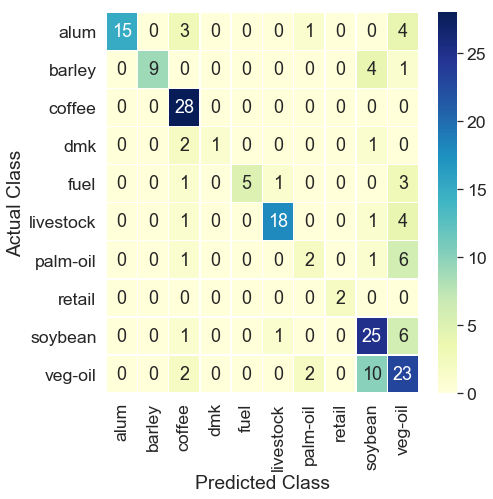

In [25]:
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
#plt.title('Confusion Matrix NBM_fig1')
plt.savefig('Fig/NBMcm1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [26]:
clfm.fit(TrDtvc, Tr_lbl) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
y_pred=clfm.predict(TsDtvc)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
print(a1,'\n',a2,'\n',a3,'\n',a4)

0.5081081081081081 
 0.5081081081081081 
 0.42944098927077656 
 0.33005987353813443


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))
confg.append(('0.3','1',"1 - 1",'Yes','5694','1'))

0.5081081081081081 
 0.30389858951586085 
 0.5081081081081081


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)

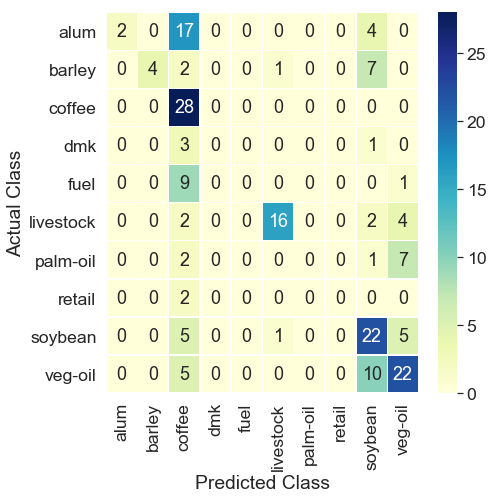

In [30]:
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, fmt="d", annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.savefig('Fig/NBMcm2.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [31]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/NBMconf1.csv')
stp

,max df,min df,ngram,idf,no. token,alpha
0,0.3,1,1 - 1,No,5694,1
1,0.3,1,1 - 1,Yes,5694,1


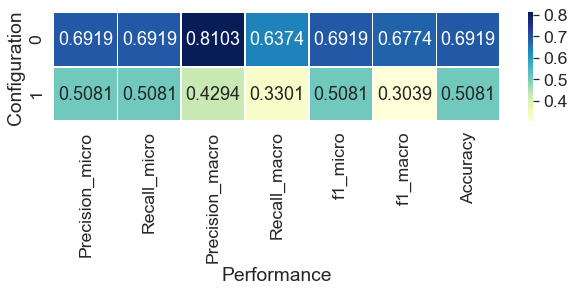

In [32]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBMprf1.csv')
plt.figure(figsize=(10,2))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBM_fig2')
plt.savefig('Fig/NBMprf1.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [33]:
#ruk ruk################

In [34]:
prf=[]
clsfv=MultinomialNB()
clsfv

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
pipclf = Pipeline([('vct', vc), ('clf',clsfv)])#('idf', idft),

In [36]:
mxd=[ 0.3, 0.35, 0.4]
mid=[0.005,0.01, 0.05, 0.1,1]
ngm=[(1,1),(1,2),(1,3),(2,5),(1,7),(1,9),(1,12)]
c=[0.005,0.05,0.1,0.15,0.2,0.3,1,2,7,9]

In [37]:
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd],
       "clf__alpha":c
       }

In [38]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=0.01,
         ngram_range=(1, 2), preprocessor=None,
         stop_words=frozenset({'since', 'several', 'ad', 'la', 'pa', 'whereupon', 'two', 'moreover', 'have', 'yourself', '85', 'almost', '63', 'ours', '81', 'whoever', 'within', 'whether', 'which', '69', 'whom', 'hers', 'lo', 'ky', 'now', 'because', 'neither', 'indeed', 'from', 'same', 'ye', 'yet', 'thin', '...22', '13', '90', 'nv', 'own', 'up', 'it', 'sixty', 'sometimes', '53', '79', 'together', 'bi', '80'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': MultinomialNB(alpha=1, class_prior=None, fit_prior=True)}

In [40]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.7027027027027027 
 0.7027027027027027 
 0.7088852813852815 
 0.6692931921192791 
 0.7027027027027027 
 0.6466558441558442 
 0.7027027027027027


In [41]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=0.005,
         ngram_range=(1, 1), preprocessor=None,
         stop_words=frozenset({'since', 'several', 'ad', 'la', 'pa', 'whereupon', 'two', 'moreover', 'have', 'yourself', '85', 'almost', '63', 'ours', '81', 'whoever', 'within', 'whether', 'which', '69', 'whom', 'hers', 'lo', 'ky', 'now', 'because', 'neither', 'indeed', 'from', 'same', 'ye', 'yet', 'thin', '...22', '13', '90', 'nv', 'own', 'up', 'it', 'sixty', 'sometimes', '53', '79', 'together', 'bi', '80'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': MultinomialNB(alpha=0.15, class_prior=None, fit_prior=True)}

In [43]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.7081081081081081 
 0.7081081081081081 
 0.7303690629011553 
 0.7432642778294952 
 0.7081081081081082 
 0.7211962327078606 
 0.7081081081081081


In [44]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.01,
         ngram_range=(1, 1), preprocessor=None,
         stop_words=frozenset({'since', 'several', 'ad', 'la', 'pa', 'whereupon', 'two', 'moreover', 'have', 'yourself', '85', 'almost', '63', 'ours', '81', 'whoever', 'within', 'whether', 'which', '69', 'whom', 'hers', 'lo', 'ky', 'now', 'because', 'neither', 'indeed', 'from', 'same', 'ye', 'yet', 'thin', '...22', '13', '90', 'nv', 'own', 'up', 'it', 'sixty', 'sometimes', '53', '79', 'together', 'bi', '80'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'clf': MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)}

In [46]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.7405405405405405 
 0.7405405405405405 
 0.756443028824433 
 0.7743063673498456 
 0.7405405405405405 
 0.7436752787139991 
 0.7405405405405405


In [47]:
#####ruk ruk############################

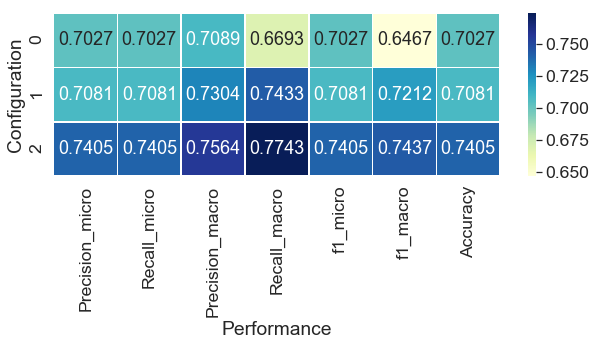

In [48]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBMprf2.csv')
plt.figure(figsize=(10,3))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBM_fig2')
plt.savefig('Fig/NBMprf2.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [49]:
#ruk ruk ################ ruk ruk##########################################

In [50]:
prf=[]
pipclf = Pipeline([('vct', vc), ('idf', idft), ('clf',clsfv)])#

In [51]:
pramg={"vct__max_df":mxd, "vct__min_df":mid, "vct__ngram_range":ngm,
       "vct__stop_words":['english', stpwd],
       "clf__alpha":c
       }

In [52]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [53]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.005,
         ngram_range=(1, 1), preprocessor=None,
         stop_words=frozenset({'since', 'several', 'ad', 'la', 'pa', 'whereupon', 'two', 'moreover', 'have', 'yourself', '85', 'almost', '63', 'ours', '81', 'whoever', 'within', 'whether', 'which', '69', 'whom', 'hers', 'lo', 'ky', 'now', 'because', 'neither', 'indeed', 'from', 'same', 'ye', 'yet', 'thin', '...22', '13', '90', 'nv', 'own', 'up', 'it', 'sixty', 'sometimes', '53', '79', 'together', 'bi', '80'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)}

In [54]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.7189189189189189 
 0.7189189189189189 
 0.7930605696719588 
 0.6555094083354953 
 0.7189189189189189 
 0.6746262929050302 
 0.7189189189189189


In [55]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.005,
         ngram_range=(1, 1), preprocessor=None,
         stop_words=frozenset({'since', 'several', 'ad', 'la', 'pa', 'whereupon', 'two', 'moreover', 'have', 'yourself', '85', 'almost', '63', 'ours', '81', 'whoever', 'within', 'whether', 'which', '69', 'whom', 'hers', 'lo', 'ky', 'now', 'because', 'neither', 'indeed', 'from', 'same', 'ye', 'yet', 'thin', '...22', '13', '90', 'nv', 'own', 'up', 'it', 'sixty', 'sometimes', '53', '79', 'together', 'bi', '80'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)}

In [57]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.7189189189189189 
 0.7189189189189189 
 0.7930605696719588 
 0.6555094083354953 
 0.7189189189189189 
 0.6746262929050302 
 0.7189189189189189


In [58]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_macro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_
clfrb.named_steps

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.05,
         ngram_range=(1, 1), preprocessor=None,
         stop_words=frozenset({'since', 'several', 'ad', 'la', 'pa', 'whereupon', 'two', 'moreover', 'have', 'yourself', '85', 'almost', '63', 'ours', '81', 'whoever', 'within', 'whether', 'which', '69', 'whom', 'hers', 'lo', 'ky', 'now', 'because', 'neither', 'indeed', 'from', 'same', 'ye', 'yet', 'thin', '...22', '13', '90', 'nv', 'own', 'up', 'it', 'sixty', 'sometimes', '53', '79', 'together', 'bi', '80'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': MultinomialNB(alpha=0.15, class_prior=None, fit_prior=True)}

In [59]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.05,
         ngram_range=(1, 1), preprocessor=None,
         stop_words=frozenset({'since', 'several', 'ad', 'la', 'pa', 'whereupon', 'two', 'moreover', 'have', 'yourself', '85', 'almost', '63', 'ours', '81', 'whoever', 'within', 'whether', 'which', '69', 'whom', 'hers', 'lo', 'ky', 'now', 'because', 'neither', 'indeed', 'from', 'same', 'ye', 'yet', 'thin', '...22', '13', '90', 'nv', 'own', 'up', 'it', 'sixty', 'sometimes', '53', '79', 'together', 'bi', '80'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': MultinomialNB(alpha=0.15, class_prior=None, fit_prior=True)}

In [60]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6702702702702703 
 0.6702702702702703 
 0.7302879970271274 
 0.668097539945366 
 0.6702702702702703 
 0.6778284954769472 
 0.6702702702702703


In [61]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_macro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_
clfrb.named_steps

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.005,
         ngram_range=(1, 2), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)}

In [62]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.35, max_features=None, min_df=0.005,
         ngram_range=(1, 2), preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)}

In [63]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6486486486486487 
 0.6486486486486487 
 0.6550054428500742 
 0.5146116104811757 
 0.6486486486486487 
 0.5414029829819305 
 0.6486486486486487


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
rCV=RandomizedSearchCV(pipclf, pramg, n_jobs=7, cv=10, scoring='f1_micro',
                        return_train_score=True) 
##f1_score(average='macro')
rCV.fit(Trfob, Tr_lbl)
clfrb=rCV.best_estimator_

c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [65]:
clfrb.named_steps

{'vct': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.4, max_features=None, min_df=0.05,
         ngram_range=(1, 3), preprocessor=None,
         stop_words=frozenset({'since', 'several', 'ad', 'la', 'pa', 'whereupon', 'two', 'moreover', 'have', 'yourself', '85', 'almost', '63', 'ours', '81', 'whoever', 'within', 'whether', 'which', '69', 'whom', 'hers', 'lo', 'ky', 'now', 'because', 'neither', 'indeed', 'from', 'same', 'ye', 'yet', 'thin', '...22', '13', '90', 'nv', 'own', 'up', 'it', 'sixty', 'sometimes', '53', '79', 'together', 'bi', '80'}),
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'idf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True),
 'clf': MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)}

In [66]:
clfrb.fit(Trfob, Tr_lbl)
y_pred=clfrb.predict(Tsfob) 
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),
              round(a7,4)))

0.6702702702702703 
 0.6702702702702703 
 0.7355950145709872 
 0.653097539945366 
 0.6702702702702703 
 0.6686885778670174 
 0.6702702702702703


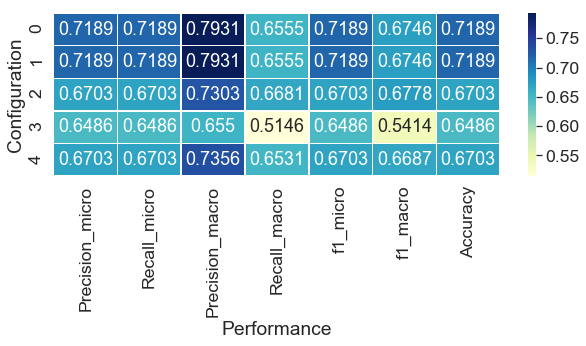

In [67]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBMprf3.csv')
plt.figure(figsize=(10,3))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBM_fig2')
plt.savefig('Fig/NBMprf3.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [68]:
###############################################

In [69]:
evlp=['Precision_micro','Recall_micro','Precision_macro','Recall_macro','f1_micro',
     'f1_macro','Accuracy']
confp=['max df','min df','ngram','idf','no. token','alpha']
confg=[]
prf=[]

In [70]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.4, min_df=0.01,
                   ngram_range=(1, 2), stop_words=stpwd)
idft1=TfidfTransformer()

In [71]:
TrDX=vc1.fit_transform(Trfob)
TrDtX=idft1.fit_transform(TrDX.toarray())
###############
TsDX=vc1.transform(Tsfob)
TsDtX=idft1.transform(TsDX.toarray())

In [72]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc1.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc1.get_feature_names())
###############
TsD=pd.DataFrame(TsDX.toarray(), columns=vc1.get_feature_names())
TsDt=pd.DataFrame(TsDtX.toarray(), columns=vc1.get_feature_names())

In [73]:
print(TrD.shape, TrDt.shape, TsD.shape, TsDt.shape)

(499, 2439) (499, 2439) (185, 2439) (185, 2439)


In [74]:
clfm=MultinomialNB(alpha=0.3)

In [75]:
clfm.fit(TrD, Tr_lbl)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [76]:
y_pred=clfm.predict(TsD)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.7135135135135136 
 0.7135135135135136 
 0.7451007921596158 
 0.7012760643195426 
 0.7135135135135136 
 0.6943086985268587 
 0.7135135135135136


In [77]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.4','0.01',"1 - 2",'No','2439','0.3'))

In [78]:
clfm.fit(TrDt, Tr_lbl)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [79]:
y_pred=clfm.predict(TsDt)
a1=precision_score(Ts_lbl, y_pred, average='micro')
a2=recall_score(Ts_lbl, y_pred, average='micro')
a3=precision_score(Ts_lbl, y_pred, average='macro')
a4=recall_score(Ts_lbl, y_pred, average='macro') 
a5=f1_score(Ts_lbl, y_pred, average='micro')
a6=f1_score(Ts_lbl, y_pred, average='macro')
a7=accuracy_score(Ts_lbl, y_pred)
print(a1,'\n',a2,'\n',a3,'\n',a4,'\n',a5,'\n',a6,'\n',a7)

0.6702702702702703 
 0.6702702702702703 
 0.6641290549118115 
 0.5685315086402043 
 0.6702702702702703 
 0.5786265491899295 
 0.6702702702702703


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [80]:
prf.append((round(a1,4),round(a2,4),round(a3,4),round(a4,4),round(a5,4),round(a6,4),round(a7,4)))
confg.append(('0.4','0.01',"1 - 2",'Yes','2439','0.3'))

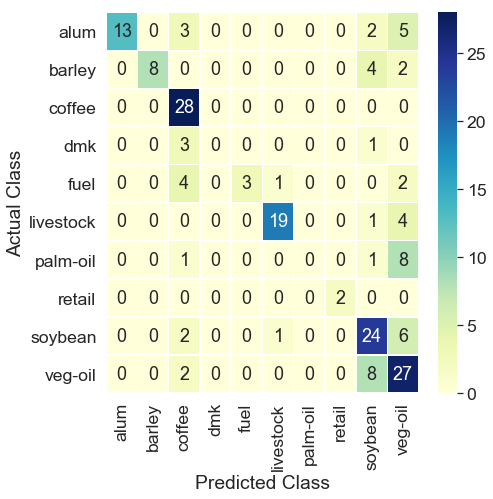

In [81]:
cm=confusion_matrix(Ts_lbl, y_pred)
m=pd.DataFrame(cm, columns=tsl, index=tsl)
plt.figure(figsize=(7,7))
sb.set(font_scale=1.6)
sb.heatmap(m, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"size": 18})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
#plt.title('Confusion Matrix NBM_fig1')
plt.savefig('Fig/NBMcm3.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [82]:
stp=pd.DataFrame(confg, columns=confp)
stp.to_csv('CSVOUT/NBMconf2.csv')
stp

,max df,min df,ngram,idf,no. token,alpha
0,0.4,0.01,1 - 2,No,2439,0.3
1,0.4,0.01,1 - 2,Yes,2439,0.3


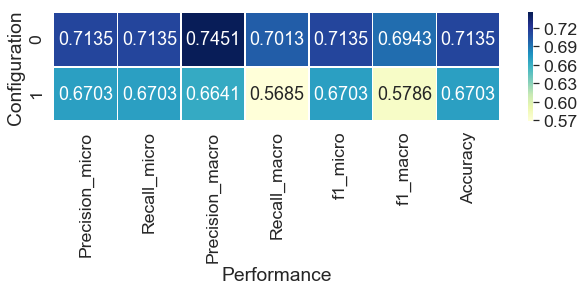

In [83]:
rsl=pd.DataFrame(prf, columns=evlp)
rsl.to_csv('CSVOUT/NBMprf4.csv')
plt.figure(figsize=(10,2))
sb.set(font_scale=1.6)
sb.heatmap(rsl, annot=True, cmap="YlGnBu", linewidths=.5, fmt="g", annot_kws={"size": 18})
plt.xlabel('Performance')
plt.ylabel('Configuration')
#plt.title('Confusion Matrix NBM_fig2')
plt.savefig('Fig/NBMprf4.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [84]:
#ruk#################ruk

In [85]:
cvp=['1','2','3','4','5','6','7','8','9','10','Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clfm, TrD, Tr_lbl, cv=10, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/10)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('10')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clfm, TrD, Tr_lbl, cv=10, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/10)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('10')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/NBMcvpf110.csv')
rsl
#print(len(sr1),len(sr2))

[0.7407, 0.7925, 0.7925, 0.7255, 0.8431, 0.7959, 0.6939, 0.766, 0.7391, 0.7391, 0.7628288086839566, 'f1 micro', '10'] 
 Average Score : 0.7628288086839566
[0.7733, 0.8144, 0.7999, 0.779, 0.8551, 0.8232, 0.7117, 0.809, 0.7605, 0.7959, 0.7922015194427028, 'f1 macro', '10'] 
 Average Score : 0.7922015194427028


,1,2,3,4,5,6,7,8,9,10,Average,metric,cv fold
0,0.7407,0.7925,0.7925,0.7255,0.8431,0.7959,0.6939,0.766,0.7391,0.7391,0.762829,f1 micro,10
1,0.7733,0.8144,0.7999,0.7790,0.8551,0.8232,0.7117,0.809,0.7605,0.7959,0.792202,f1 macro,10


In [86]:
cvp=['1','2','3','4','5','6','7','8','9','10','Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clfm, TrDt, Tr_lbl, cv=10, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/10)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('10')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clfm, TrDt, Tr_lbl, cv=10, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/10)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('10')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/NBMcvpf110t.csv')
rsl
#print(len(sr1),len(sr2))

[0.7593, 0.7547, 0.7358, 0.8431, 0.7451, 0.7347, 0.7143, 0.7021, 0.7609, 0.7174, 0.7467428712089176, 'f1 micro', '10'] 
 Average Score : 0.7467428712089176


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: Undefin

[0.7459, 0.5792, 0.6716, 0.8489, 0.7052, 0.5946, 0.7042, 0.5468, 0.7639, 0.6271, 0.6787488550730713, 'f1 macro', '10'] 
 Average Score : 0.6787488550730713


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,1,2,3,4,5,6,7,8,9,10,Average,metric,cv fold
0,0.7593,0.7547,0.7358,0.8431,0.7451,0.7347,0.7143,0.7021,0.7609,0.7174,0.746743,f1 micro,10
1,0.7459,0.5792,0.6716,0.8489,0.7052,0.5946,0.7042,0.5468,0.7639,0.6271,0.678749,f1 macro,10


In [87]:
cvp=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
    'Average','metric','cv fold']
cvs=[]
clf_crs=cross_val_score(clfm, TrDt, Tr_lbl, cv=20, scoring='f1_micro')
sr1=[round(e,4) for e in clf_crs]
a1=(sum(clf_crs)/20)
sr1.append(a1)
sr1.append('f1 micro')
sr1.append('20')
print(sr1,'\n','Average Score :',a1)
clf_crs=cross_val_score(clfm, TrDt, Tr_lbl, cv=20, scoring='f1_macro')
sr2=[round(e,4) for e in clf_crs]
a2=(sum(clf_crs)/20)
sr2.append(a2)
sr2.append('f1 macro')
sr2.append('20')
print(sr2,'\n','Average Score :',a2)
cvs.append(sr1)
cvs.append(sr2)
rsl=pd.DataFrame(cvs, columns=cvp)
rsl.to_csv('CSVOUT/NBMcvpf120d.csv')
rsl
#print(len(sr1),len(sr2))

c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


[0.6207, 0.7586, 0.6897, 0.75, 0.8214, 0.7143, 0.7857, 0.8889, 0.7037, 0.8148, 0.8, 0.8333, 0.6667, 0.6522, 0.6957, 0.8571, 0.7143, 0.75, 0.6316, 0.8421, 0.7495370182494383, 'f1 micro', '20'] 
 Average Score : 0.7495370182494383


c:\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sk

[0.5976, 0.7079, 0.5229, 0.6034, 0.7206, 0.5746, 0.8167, 0.7689, 0.5756, 0.7384, 0.7945, 0.7739, 0.5684, 0.4204, 0.5366, 0.7935, 0.6806, 0.6324, 0.5634, 0.6821, 0.6536208598500266, 'f1 macro', '20'] 
 Average Score : 0.6536208598500266


c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,Average,metric,cv fold
0,0.6207,0.7586,0.6897,0.7500,0.8214,0.7143,0.7857,0.8889,0.7037,0.8148,...,0.6522,0.6957,0.8571,0.7143,0.7500,0.6316,0.8421,0.749537,f1 micro,20
1,0.5976,0.7079,0.5229,0.6034,0.7206,0.5746,0.8167,0.7689,0.5756,0.7384,...,0.4204,0.5366,0.7935,0.6806,0.6324,0.5634,0.6821,0.653621,f1 macro,20


In [97]:
vc=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.35, min_df=0.005,
                   ngram_range=(1, 2), stop_words=stpwd)
idft=TfidfTransformer()

In [98]:
TrDX=vc.fit_transform(Trfob)
TrDtX=idft.fit_transform(TrDX.toarray())

In [99]:
TrD=pd.DataFrame(TrDX.toarray(), columns=vc.get_feature_names())
TrDt=pd.DataFrame(TrDtX.toarray(), columns=vc.get_feature_names())

In [100]:
vc1=CountVectorizer(analyzer='word', binary=False, lowercase=True, max_df=0.4, min_df=0.01,
                   ngram_range=(1, 2), stop_words=stpwd)
idft1=TfidfTransformer()

In [101]:
TrD1X=vc1.fit_transform(Trfob)
TrDt1X=idft1.fit_transform(TrD1X.toarray())

In [102]:
TrD1=pd.DataFrame(TrD1X.toarray(), columns=vc1.get_feature_names())
TrDt1=pd.DataFrame(TrDt1X.toarray(), columns=vc1.get_feature_names())

In [104]:
TrDX=TrDtX=TrD1X=TrDt1X=None

In [103]:
print(TrD.shape,TrDt.shape,TrD1.shape,TrDt1.shape)

(499, 5289) (499, 5289) (499, 2439) (499, 2439)


In [106]:
v1=TrD.var()
v2=TrDt.var()
v3=TrD1.var()
v4=TrDt1.var()

In [107]:
cv1=TrD.cov()
cv2=TrDt.cov()
cv3=TrD1.cov()
cv4=TrDt1.cov()

In [109]:
cr1=TrD.corr()

In [110]:
cr2=TrDt.corr()

In [111]:
cr3=TrD1.corr()

In [112]:
cr4=TrDt1.corr()

In [113]:
print(min(v1),max(v1))

0.005987879373204242 11.218364439722775


In [114]:
print(min(v2),max(v2))

6.920911882702201e-06 0.011919795898280064


In [115]:
print(min(v3),max(v3))

0.009939557830520482 11.218364439722775


In [116]:
print(min(v4),max(v4))

1.3284643064703313e-05 0.01359895330434166


In [140]:
k1u=[e for e in v1 if(e>5)]
k1l=[e for e in v1 if(e<1)]
print(len(k1u)/5289, len(k1l)/5289)

0.0009453582907922103 0.9903573454339194


In [141]:
k2u=[e for e in v2 if(e>10**-3)]
k2l=[e for e in v2 if(e<10**-5)]
print(len(k2u)/5289, len(k2l)/5289)

0.0274153904329741 0.07335980336547551


In [142]:
k3u=[e for e in v3 if(e>5)]
k3l=[e for e in v3 if(e<1)]
print(len(k3u)/2439, len(k3l)/2439)

0.0024600246002460025 0.9782697826978269


In [143]:
k4u=[e for e in v4 if(e>10**-3)]
k4l=[e for e in v4 if(e<10**-4)]
print(len(k4u)/2439, len(k4l)/2439)

0.08077080770807708 0.25379253792537926


In [ ]:
confp=['max df', 'min df', 'ngram', 'idf','no. token','max var', 'min var','phvrc','plvrc']
conf=[]
conf.append((0.35,0.005,'1 - 2','No','5289','11.218',0,'0.0009','0.990'))
conf.append((0.35,0.005,'1 - 2','Yes','5289','0.011',0,'0.027','0.073'))
conf.append((0.35,0.005,'1 - 2','No','2439','11.218',0,'0.0024','0.978'))
conf.append((0.4,0.01,'1 - 2','Yes','2439','0.013',0,'0.080','0.253'))
rl=pd.DataFrame(conf, columns=confp)
rl.to_csv('CSVOUT/NBMVar.csv')
rl

In [148]:
cCl1=set()
crCl1=set()
for cl in cr1:
    lidx=cr1.index[(abs(cr1[cl])>0.65) & (cr1[cl]<1)].tolist()
    for e in lidx:
        cCl1.add(e)
        if((e, cl) not in crCl1):
            crCl1.add((cl, e)) 
print(len(cCl1),len(crCl1))

3936 67502


In [149]:
print(len(cCl1)/5289,len(crCl1)/(5289*2645-5289))

0.7441860465116279 0.004827048059383947


In [150]:
cCl2=set()
crCl2=set()
for cl in cr2:
    lidx=cr2.index[(abs(cr2[cl])>0.65) & (cr2[cl]<1)].tolist()
    for e in lidx:
        cCl2.add(e)
        if((e, cl) not in crCl2):
            crCl2.add((cl, e))
print(len(cCl2),len(crCl2))

4074 33369


In [151]:
print(len(cCl2)/5289,len(crCl2)/(5289*2645-5289))

0.7702779353374929 0.0023862073226509277


In [152]:
cCl3=set()
crCl3=set()
for cl in cr3:
    lidx=cr3.index[(abs(cr3[cl])>0.65) & (cr3[cl]<1)].tolist()
    for e in lidx:
        cCl3.add(e)
        if((e, cl) not in crCl3):
            crCl3.add((cl, e))
print(len(cCl3),len(crCl3))

1240 6303


In [153]:
print(len(cCl3)/2439,len(crCl3)/(((2439*1220)/2)-2439))

0.5084050840508405 0.004243441449192817


In [156]:
cCl4=set()
crCl4=set()
for cl in cr4:
    lidx=cr4.index[(abs(cr4[cl])>0.65) & (cr4[cl]<1)].tolist()
    for e in lidx:
        cCl4.add(e)
        if((e, cl) not in crCl4):
            crCl4.add((cl, e))
print(len(cCl4),len(crCl4))

1160 3146


In [155]:
print(len(cCl4)/2439,len(crCl4)/(((2439*1220)/2)-2439))

0.4756047560475605 0.0021180178961067117


In [160]:
confp=['max df', 'min df', 'ngram', 'idf','no. token','phrc']
conf=[]
conf.append((0.35,0.005,'1 - 2','No','5289',0.744))
conf.append((0.35,0.005,'1 - 2','Yes','5289',0.770))
conf.append((0.35,0.005,'1 - 2','No','2439',0.508))
conf.append((0.4,0.01,'1 - 2','Yes','2439',0.475))
rlr=pd.DataFrame(conf, columns=confp)
rlr.to_csv('CSVOUT/NBMcr.csv')
rlr

,max df,min df,ngram,idf,no. token,phrc
0,0.35,0.005,1 - 2,No,5289,0.744
1,0.35,0.005,1 - 2,Yes,5289,0.770
2,0.35,0.005,1 - 2,No,2439,0.508
3,0.40,0.010,1 - 2,Yes,2439,0.475


In [169]:
cvi1=cv1.min()
cvx1=cv1.max()
cvi2=cv2.min()
cvx2=cv2.max()
cvi3=cv3.min()
cvx3=cv3.max()
cvi4=cv4.min()
cvx4=cv4.max()

In [171]:
q11,q13=cvi1.quantile(q=0.3),cvx1.quantile(q=0.7)
q21,q23=cvi2.quantile(q=0.3),cvx2.quantile(q=0.7)
q31,q33=cvi3.quantile(q=0.3),cvx3.quantile(q=0.7)
q41,q43=cvi4.quantile(q=0.3),cvx4.quantile(q=0.7)
q51,q53=cvi1.quantile(q=0.1),cvx1.quantile(q=0.6)
q61,q63=cvi2.quantile(q=0.1),cvx2.quantile(q=0.6)
q71,q73=cvi3.quantile(q=0.1),cvx3.quantile(q=0.6)
q81,q83=cvi4.quantile(q=0.1),cvx4.quantile(q=0.6)

In [172]:
print(q11,q13)
print(q21,q23)
print(q31,q33)
print(q41,q43)
print(q51,q53)
print(q61,q63)
print(q71,q73)
print(q81,q83)

-0.016962438934093108 0.09990664059041773
-4.173639455293909e-05 0.00023423164060581335
-0.03761337936918016 0.16026913264279524
-0.00010242512631146642 0.00044158068004898274
-0.04082140183982425 0.08238806931131332
-9.164979703173737e-05 0.00018377175259275998
-0.08478804999557342 0.12121994994004062
-0.00020439680507525277 0.0003472073754846079


In [168]:
cCVl1i1=set()
cvCl1i1=set()
for cl in cv1:
    lidx=cv1.index[(abs(cv1[cl])<q11)].tolist()
    for e in lidx:
        cCVl3.add(e)
        if((e, cl) not in cvCl3):
            cvCl3.add((cl, e))
print(len(cCVl3),len(cvCl3))
#(((2439*1220)/2)-2439)

2350 52068
